In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [27]:
%pwd
#df = pd.read_csv()

'/home/jovyan/xtrak/notebooks'

In [28]:
dfSat = pd.read_csv('../data_prod/IceSat2ZachData')

In [29]:

dfSat.columns

Index(['lon', 'lat', 'h', 'track', 'date', 'x', 'y'], dtype='object')

In [30]:
dfSat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718672 entries, 0 to 718671
Data columns (total 7 columns):
lon      718672 non-null float64
lat      718672 non-null float64
h        718672 non-null float64
track    718672 non-null object
date     718672 non-null object
x        718672 non-null float64
y        718672 non-null float64
dtypes: float64(5), object(2)
memory usage: 38.4+ MB


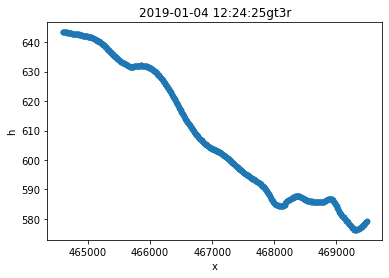

In [81]:
%matplotlib inline
for day in dfSat.date.unique()[:1]:
    for tr in dfSat.track.unique()[:1]:
        dfTran = dfSat.query('date == @day & track == @tr')
        if dfTran.shape[0] == 0:
            continue
        dfTran.plot(x='x',y='h',title = str(day)+str(tr),kind='scatter')

In [127]:
roll = dfEr['h'].rolling(window=25,center=True).median()

In [124]:
hSmooth = np.array([])
dat = dfSat.date.unique()[0]
trk = dfSat.track.unique()[0]

In [125]:
print(dat+trk)
dfEr = dfSat.query('date == @dat & track == @trk')

2019-01-04 12:24:25gt3r


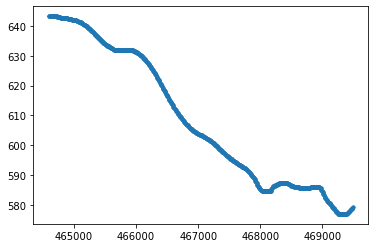

In [129]:
plt.plot(dfEr['x'],roll,'.')

In [204]:
pd.Series(np.zeros(dfSat.shape[0]))

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
718642    0.0
718643    0.0
718644    0.0
718645    0.0
718646    0.0
718647    0.0
718648    0.0
718649    0.0
718650    0.0
718651    0.0
718652    0.0
718653    0.0
718654    0.0
718655    0.0
718656    0.0
718657    0.0
718658    0.0
718659    0.0
718660    0.0
718661    0.0
718662    0.0
718663    0.0
718664    0.0
718665    0.0
718666    0.0
718667    0.0
718668    0.0
718669    0.0
718670    0.0
718671    0.0
Length: 718672, dtype: float64

In [31]:
%matplotlib inline
#smoothing
#tran = pd.Series(np.array([]))
hMedSm = pd.Series(np.zeros(dfSat.shape[0]))
hMedSupSm = pd.Series(np.zeros(dfSat.shape[0]))
#hGauss = pd.Series(np.array([]))
for day in dfSat.date.unique():
    for tr in dfSat.track.unique():
        log = (dfSat['date'] == day) & (dfSat['track'] == tr)
        #tran = dfSat.query('date == @day & track == @tr')['h']
        #dfTran.sort_values(by='x',inplace=True)
        tran = dfSat[log]
        if tran.shape[0] == 0:
            continue
        print(tran.shape)
        hMedSm[log] = tran['h'].rolling(window=25,center=True).median()
        hMedSupSm[log] = tran['h'].rolling(window=100,center=True).median()
        #tran['h_gauss'] = pd.concat((hGauss,tran['h'].rolling(window=100,center=True,win_type='gaussian').mean(std=5)))
dfSat['hSm'] = hMedSm
dfSat['hSupSm'] = hMedSupSm
#dfExtra = dfSat.merge(hMed)

(1368, 7)
(434, 7)
(1663, 7)
(3377, 7)
(3361, 7)
(2516, 7)
(2488, 7)
(1690, 7)
(492, 7)
(795, 7)
(2, 7)
(3875, 7)
(3922, 7)
(3929, 7)
(3919, 7)
(3905, 7)
(3862, 7)
(3977, 7)
(3940, 7)
(3949, 7)
(3935, 7)
(3944, 7)
(3964, 7)
(3070, 7)
(1364, 7)
(1384, 7)
(2211, 7)
(2229, 7)
(3049, 7)
(3837, 7)
(3944, 7)
(3950, 7)
(3964, 7)
(3965, 7)
(3855, 7)
(930, 7)
(55, 7)
(76, 7)
(915, 7)
(3956, 7)
(3963, 7)
(3958, 7)
(3955, 7)
(3963, 7)
(3958, 7)
(1894, 7)
(3630, 7)
(3613, 7)
(2773, 7)
(2755, 7)
(1915, 7)
(3919, 7)
(3908, 7)
(3902, 7)
(3949, 7)
(3962, 7)
(3919, 7)
(963, 7)
(2652, 7)
(2636, 7)
(1816, 7)
(1801, 7)
(984, 7)
(494, 7)
(3, 7)
(891, 7)
(293, 7)
(1206, 7)
(384, 7)
(3942, 7)
(3935, 7)
(3920, 7)
(3953, 7)
(3962, 7)
(3932, 7)
(587, 7)
(4, 7)
(199, 7)
(23, 7)
(175, 7)
(29, 7)
(3925, 7)
(3912, 7)
(3946, 7)
(3883, 7)
(3907, 7)
(3920, 7)
(4, 7)
(3, 7)
(12, 7)
(3922, 7)
(3930, 7)
(3915, 7)
(3947, 7)
(3942, 7)
(3916, 7)
(1064, 7)
(1159, 7)
(258, 7)
(390, 7)
(3983, 7)
(3933, 7)
(3935, 7)
(3960, 7)
(

In [183]:
dfSat.groupby()

Signature:
dfSat.groupby(
    ['by=None', 'axis=0', 'level=None', 'as_index=True', 'sort=True', 'group_keys=True', 'squeeze=False', 'observed=False', '**kwargs'],
)
Docstring:
Group DataFrame or Series using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, or list of labels
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If an ndarray is passed, the
    values are used as-is determine the groups. A label or list of
    labels may be passed to group by the columns in ``self``. Notice
    that a t

In [177]:
dfSat['hMedian'] = hMed.values
dfSat['hGaussian'] = hGauss.values
#hSmooth = np.concatenate((hSmooth,tran.rolling(window=25,center=True,win_type='gaussian').mean(std=5)))

In [169]:
sum(hMed.isna())

24

(1368, 9)


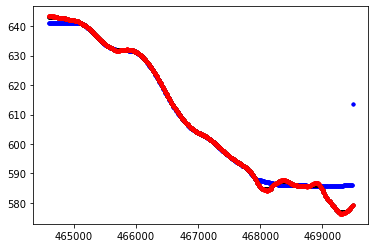

(0, 9)


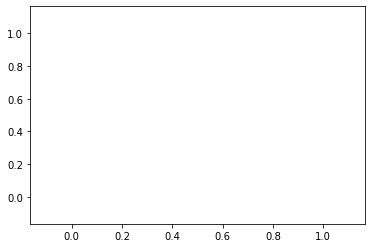

(0, 9)


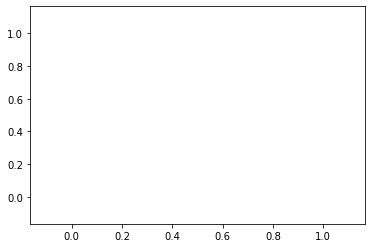

(0, 9)


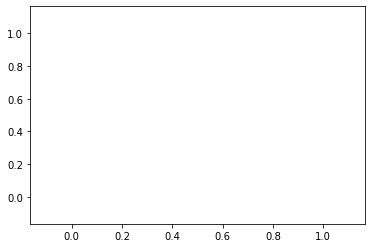

(0, 9)


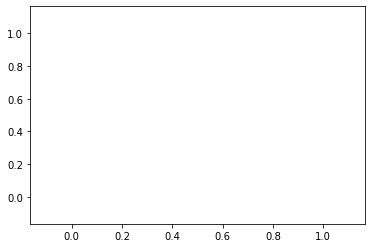

(434, 9)


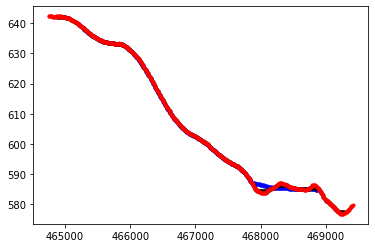

(1663, 9)


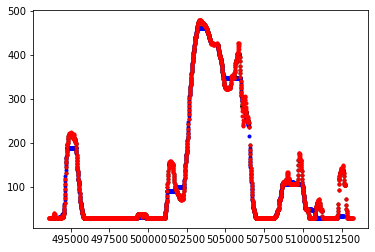

(3377, 9)


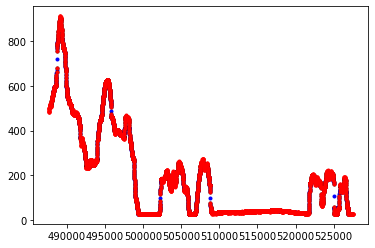

(3361, 9)


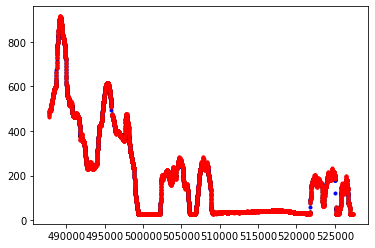

(2516, 9)


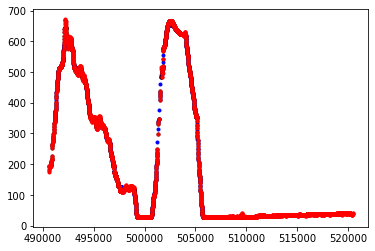

(2488, 9)


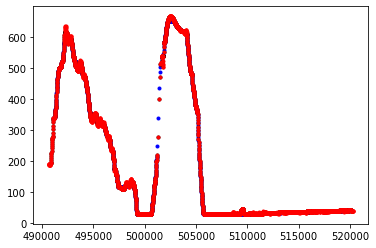

(1690, 9)


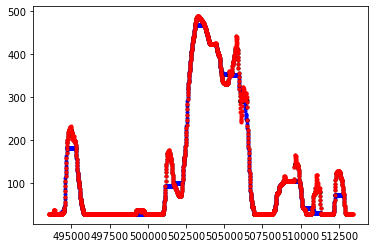

(0, 9)


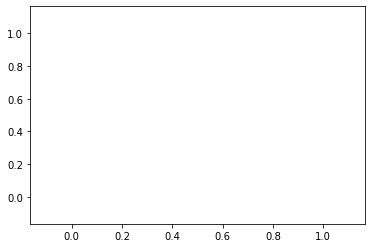

(492, 9)


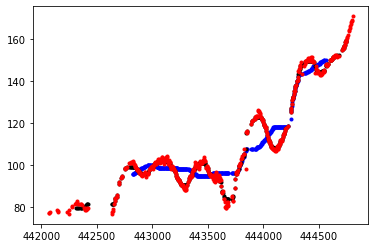

(795, 9)


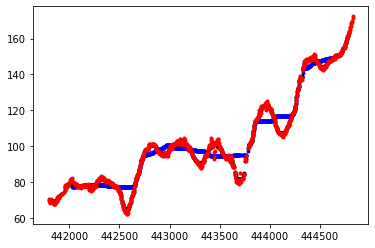

(0, 9)


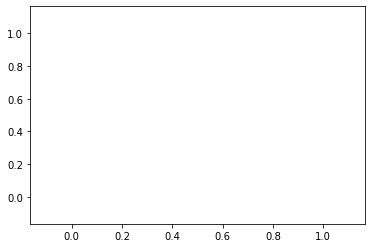

(2, 9)


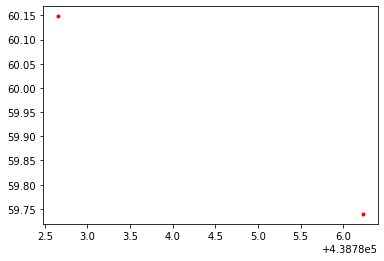

(0, 9)


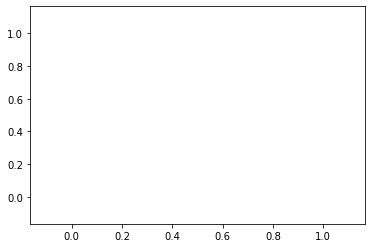

(3875, 9)


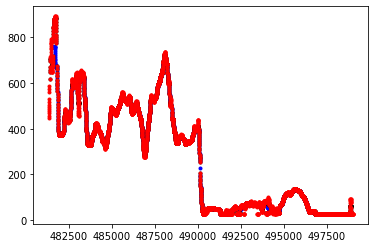

(3922, 9)


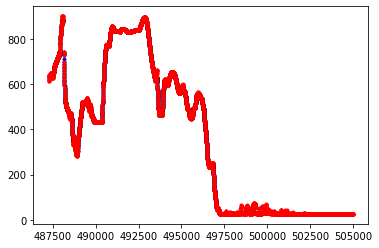

(3929, 9)


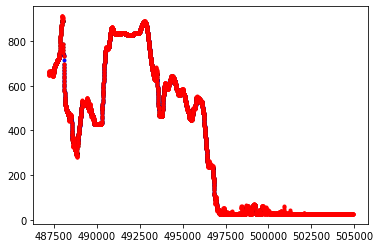

(3919, 9)


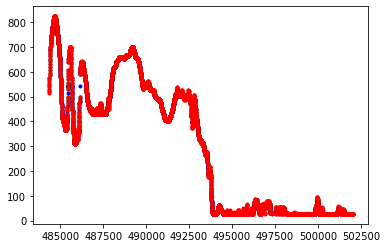

(3905, 9)


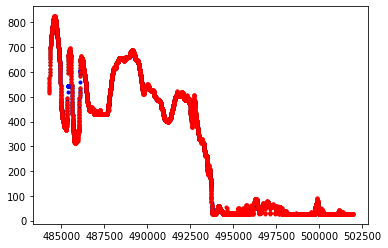

(3862, 9)


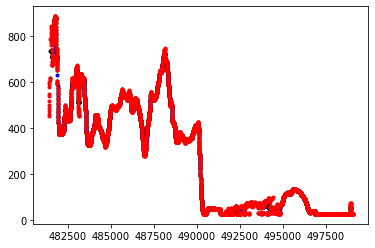

(3977, 9)


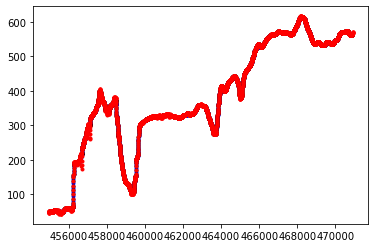

(3940, 9)


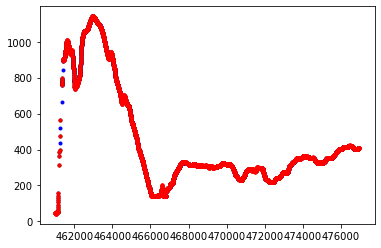

(3949, 9)


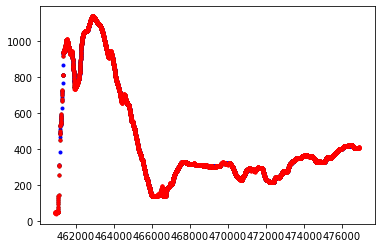

(3935, 9)


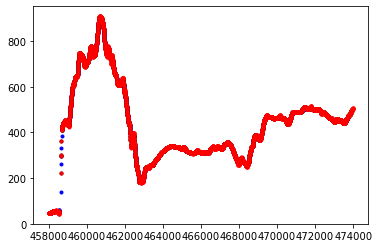

(3944, 9)


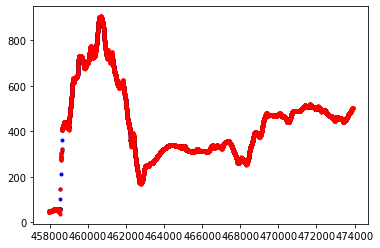

(3964, 9)


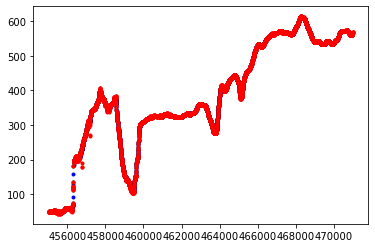

(3070, 9)


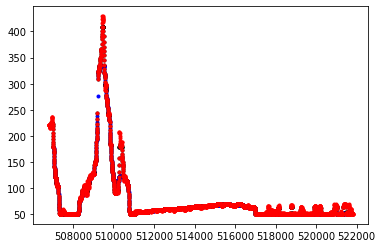

(1364, 9)


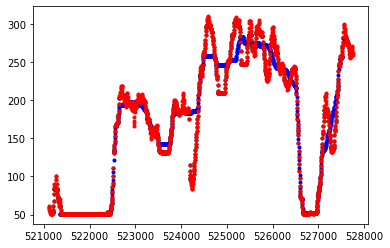

(1384, 9)


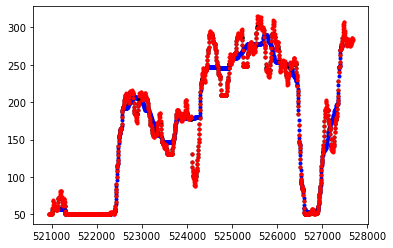

(2211, 9)


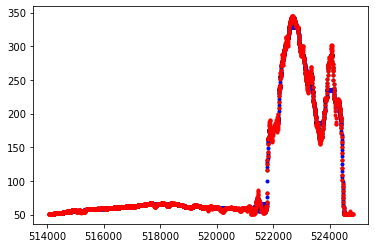

(2229, 9)


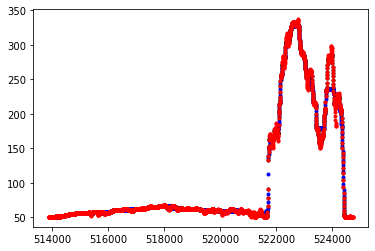

(3049, 9)


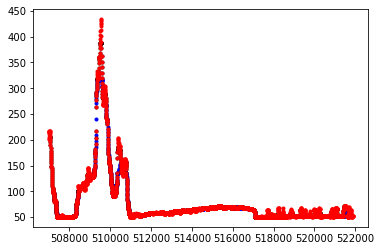

(3837, 9)


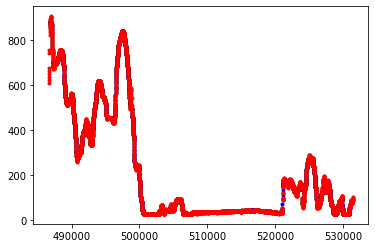

(3944, 9)


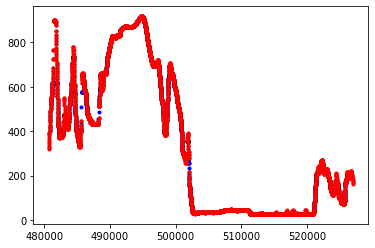

(3950, 9)


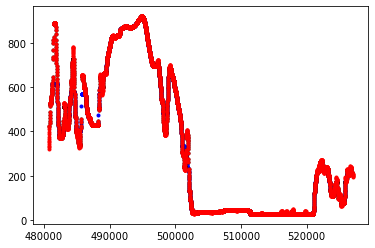

(3964, 9)


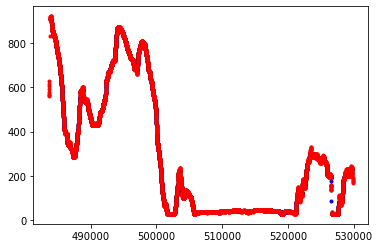

(3965, 9)


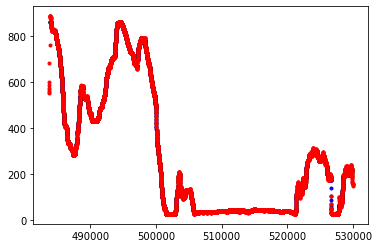

(3855, 9)


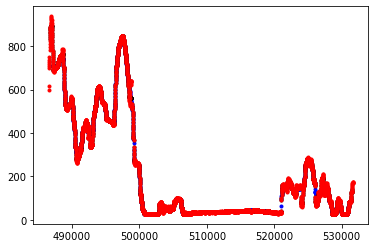

(930, 9)


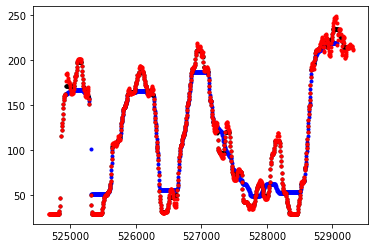

(0, 9)


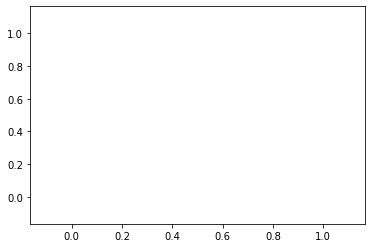

(0, 9)


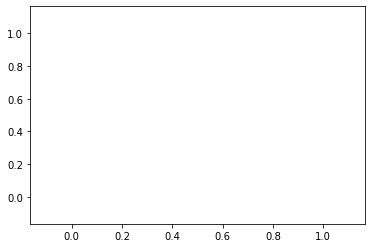

(55, 9)


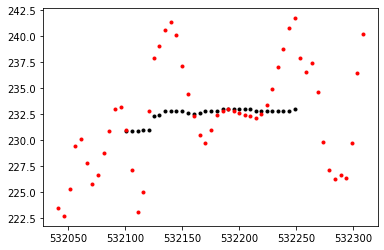

(76, 9)


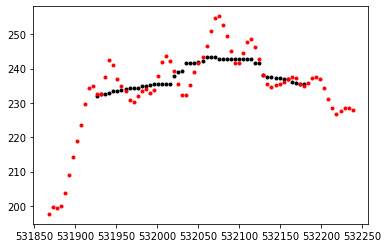

(915, 9)


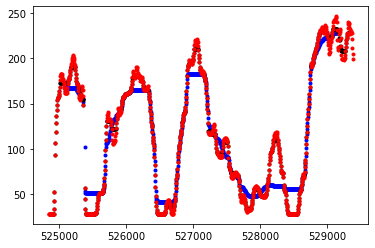

(3956, 9)


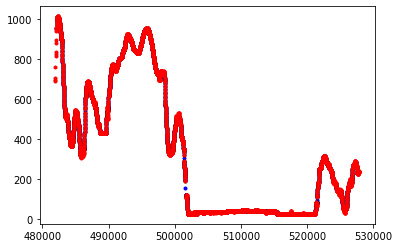

(3963, 9)


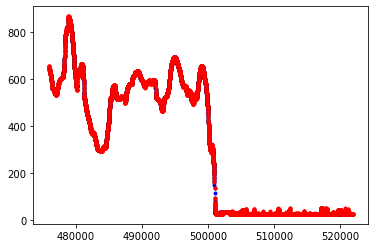

(3958, 9)


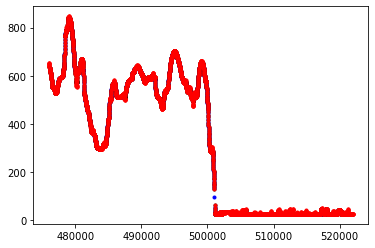

(3955, 9)


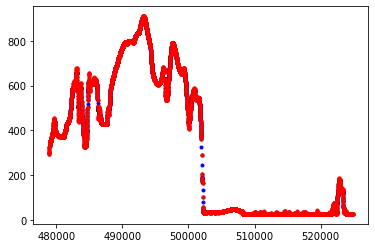

(3963, 9)


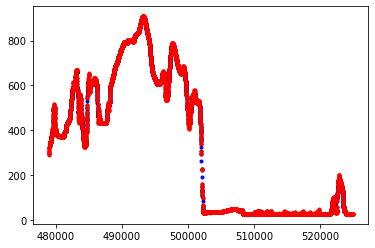

(3958, 9)


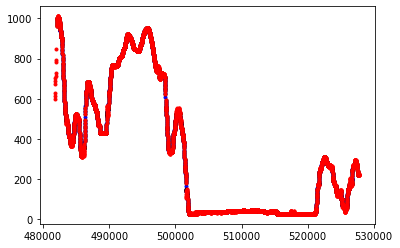

(1894, 9)


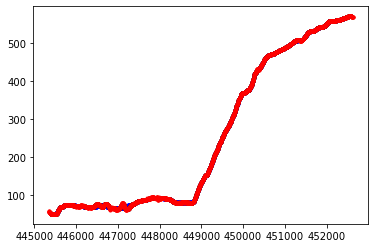

(3630, 9)


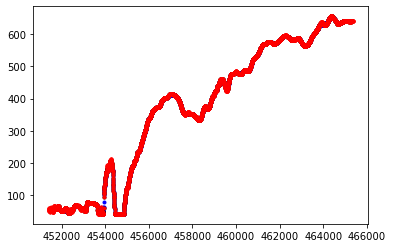

(3613, 9)


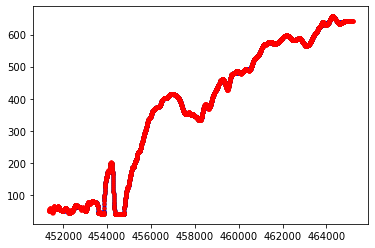

(2773, 9)


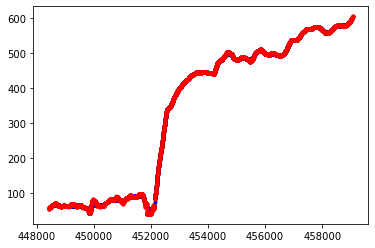

(2755, 9)


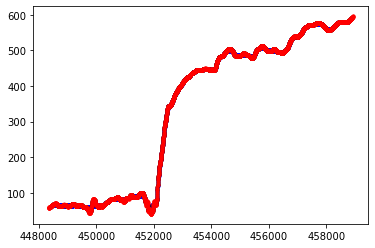

(1915, 9)


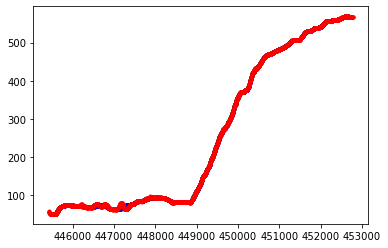

(3919, 9)


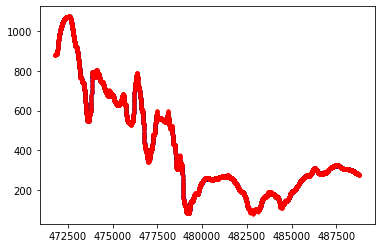

(3908, 9)


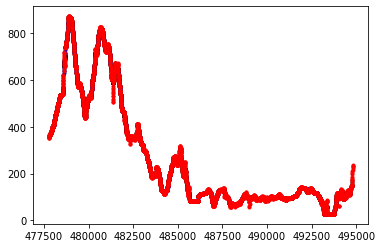

(3902, 9)


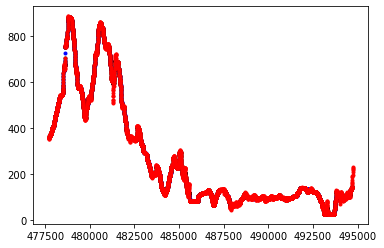

(3949, 9)


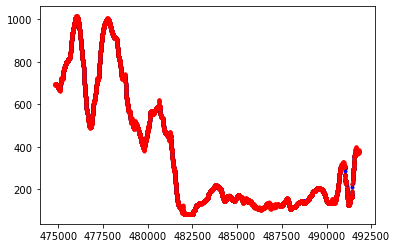

(3962, 9)


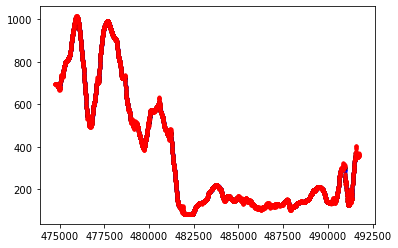

(3919, 9)


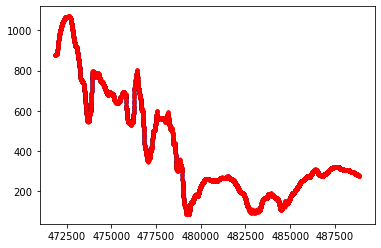

(963, 9)


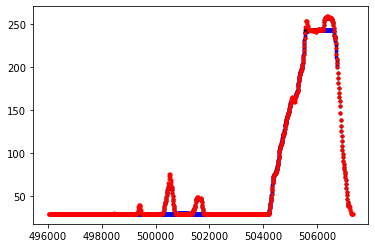

(2652, 9)


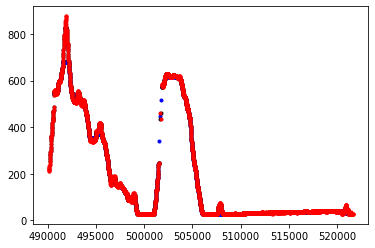

(2636, 9)


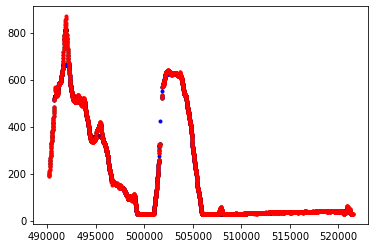

(1816, 9)


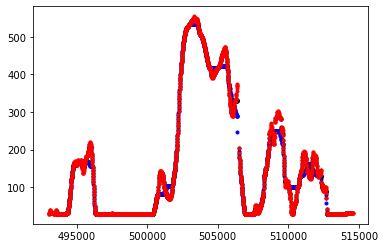

(1801, 9)


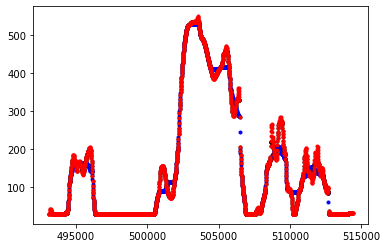

(984, 9)


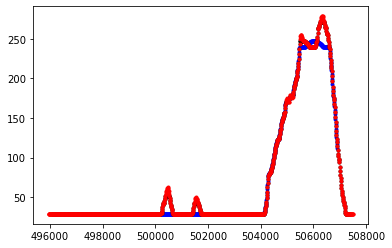

(494, 9)


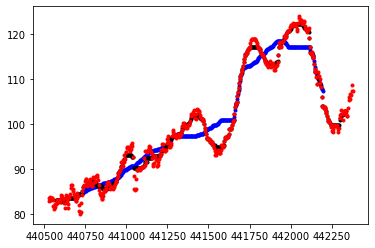

(3, 9)


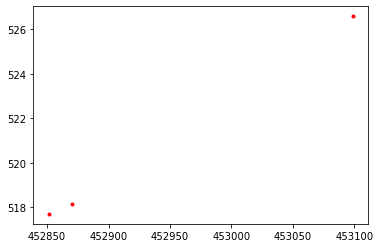

(891, 9)


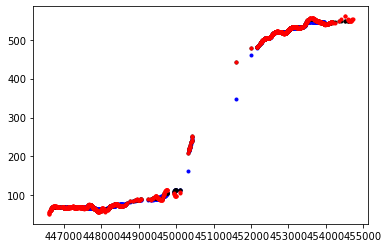

(293, 9)


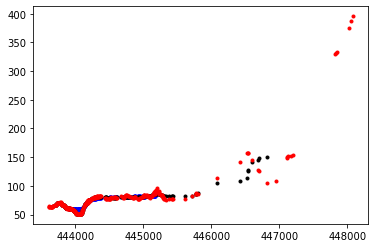

(1206, 9)


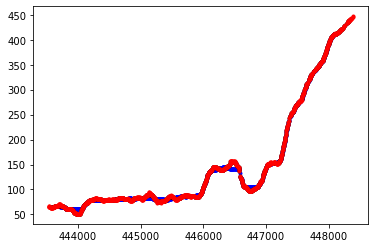

(384, 9)


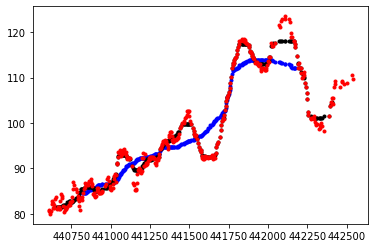

(3942, 9)


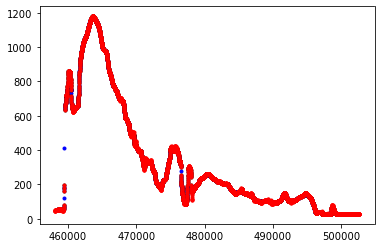

(3935, 9)


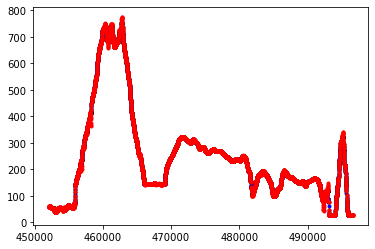

(3920, 9)


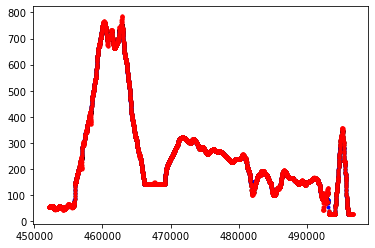

(3953, 9)


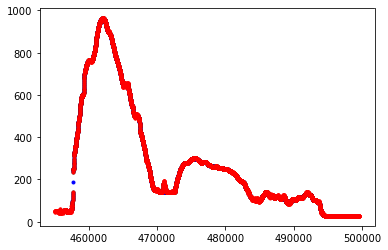

(3962, 9)


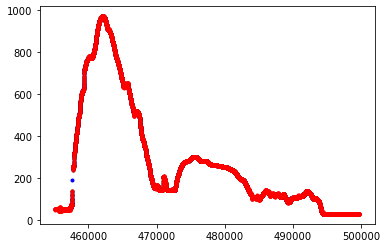

(3932, 9)


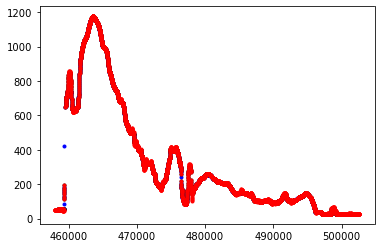

(587, 9)


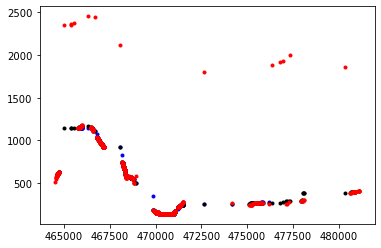

(4, 9)


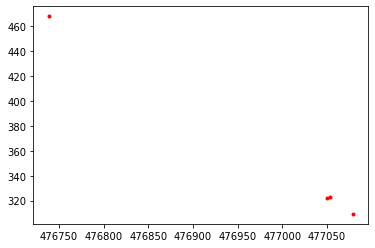

(199, 9)


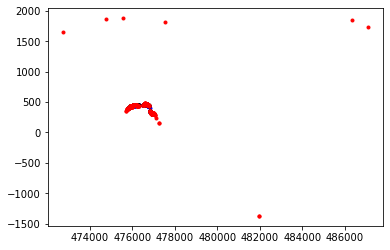

(23, 9)


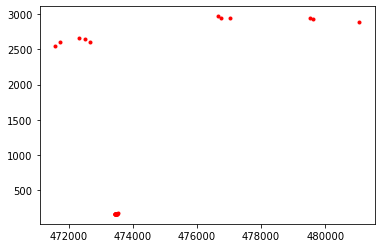

(175, 9)


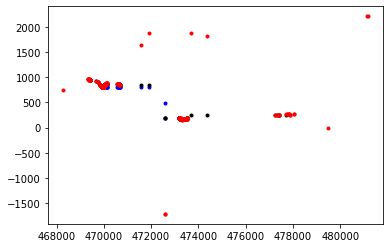

(29, 9)


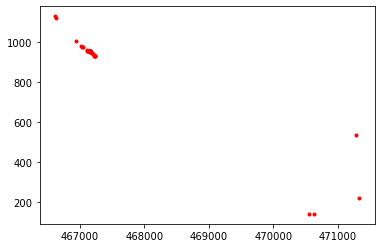

(3925, 9)


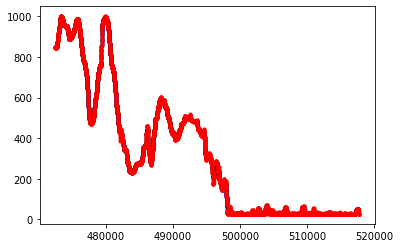

(3912, 9)


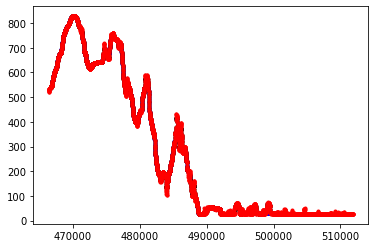

(3946, 9)


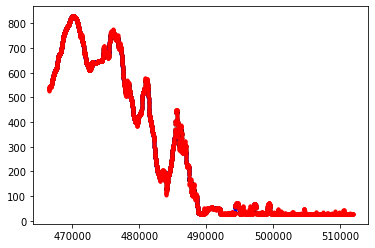

(3883, 9)


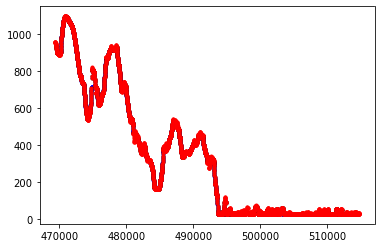

(3907, 9)


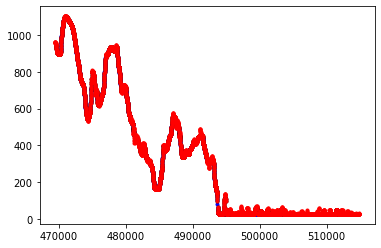

(3920, 9)


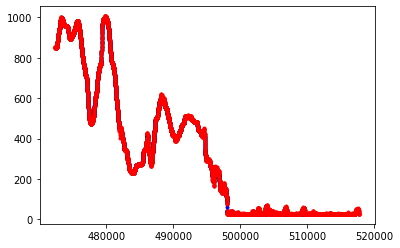

(4, 9)


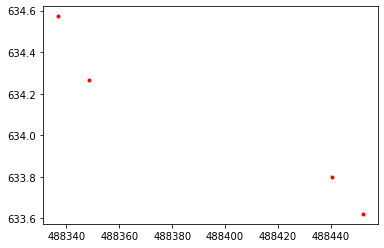

(0, 9)


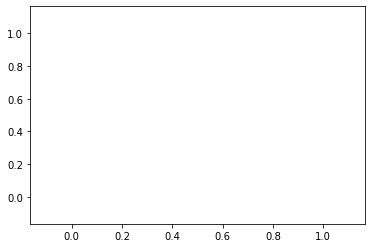

(3, 9)


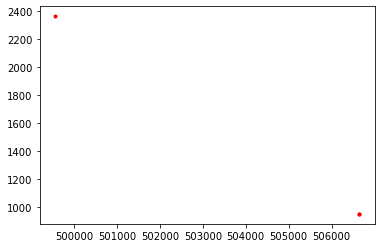

(0, 9)


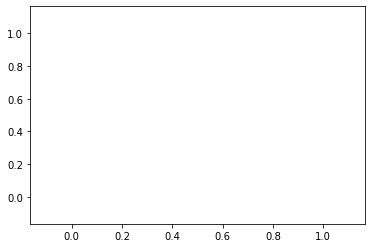

(12, 9)


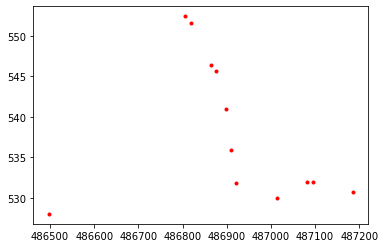

(0, 9)


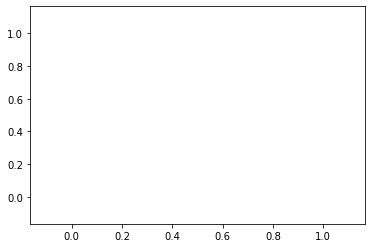

(3922, 9)


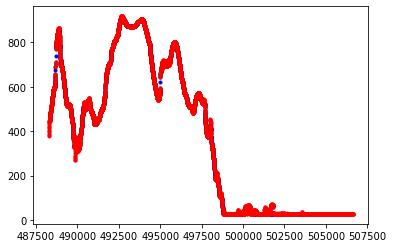

(3930, 9)


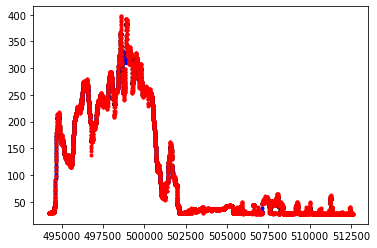

(3915, 9)


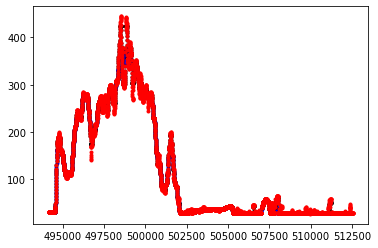

(3947, 9)


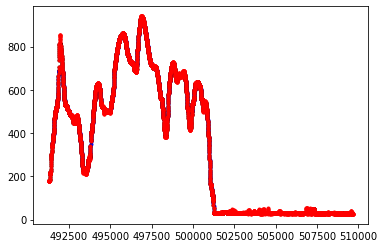

(3942, 9)


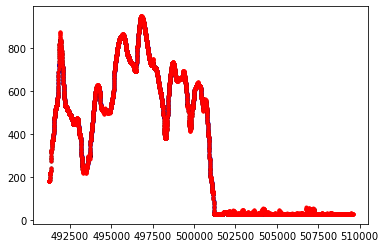

(3916, 9)


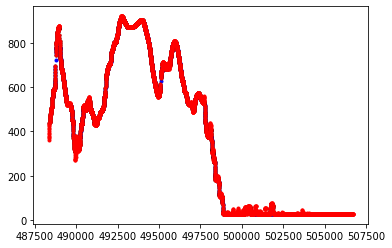

(0, 9)


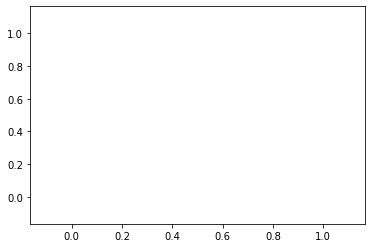

(1064, 9)


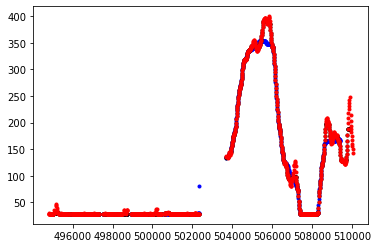

(1159, 9)


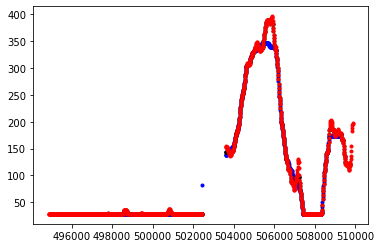

(258, 9)


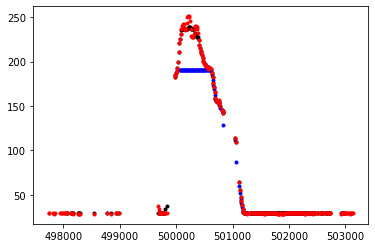

(390, 9)


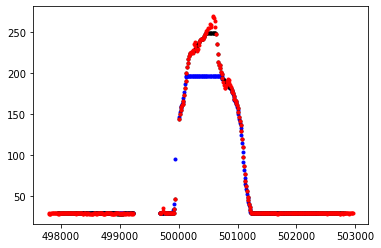

(0, 9)


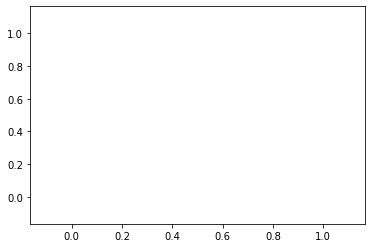

(3983, 9)


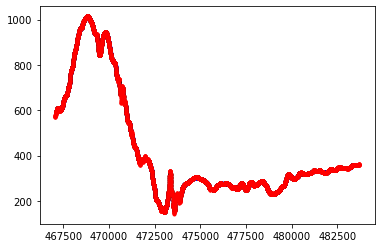

(3933, 9)


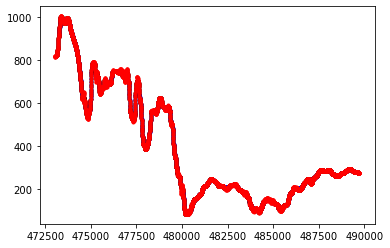

(3935, 9)


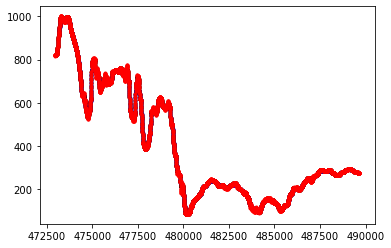

(3960, 9)


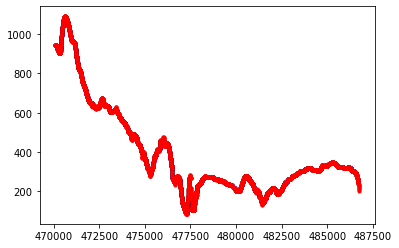

(3957, 9)


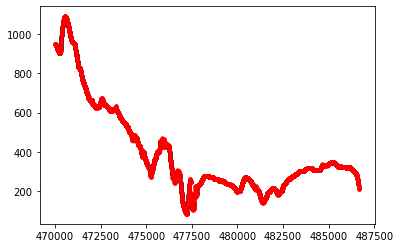

(3980, 9)


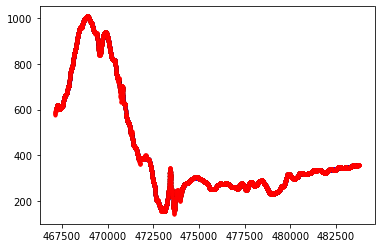

(3937, 9)


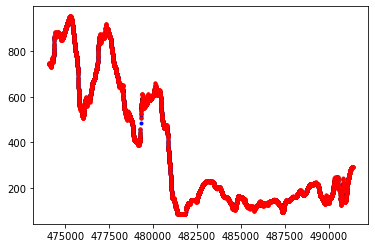

(3871, 9)


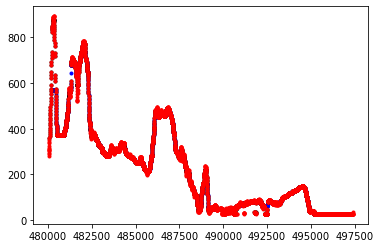

(3877, 9)


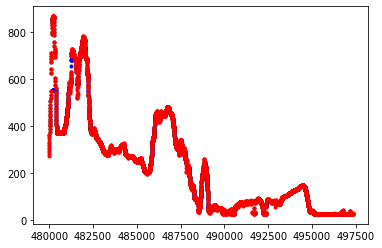

(3915, 9)


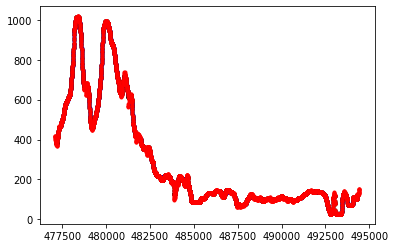

(3949, 9)


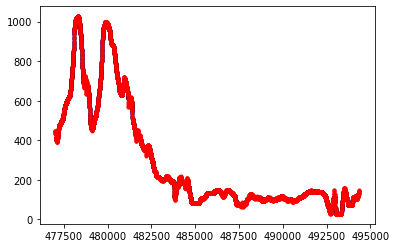

(3932, 9)


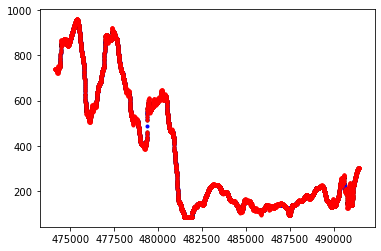

(0, 9)


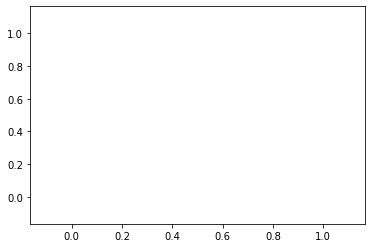

(643, 9)


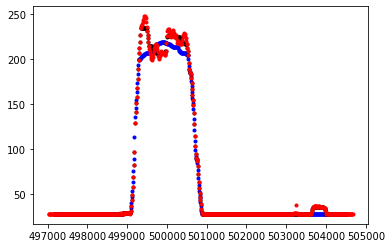

(623, 9)


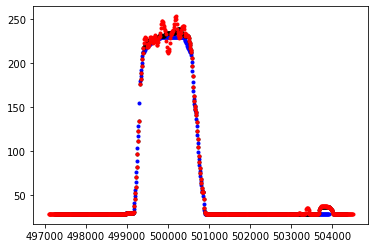

(0, 9)


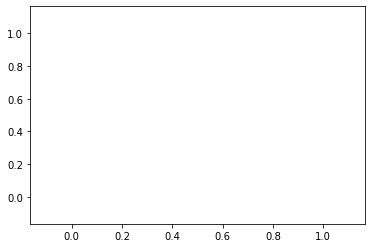

(0, 9)


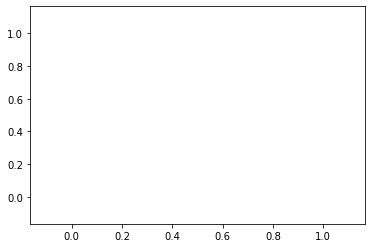

(0, 9)


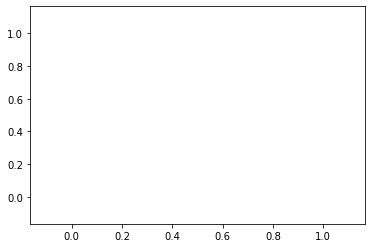

(3980, 9)


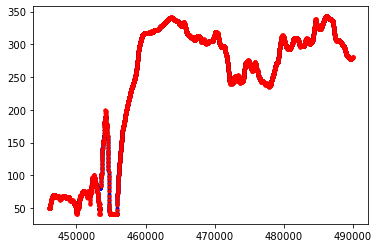

(3969, 9)


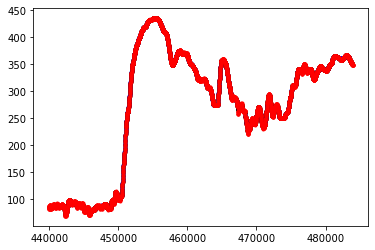

(3971, 9)


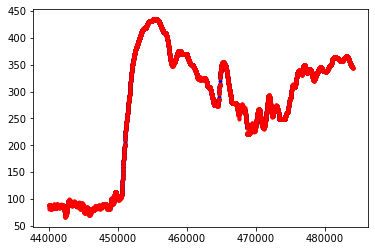

(3972, 9)


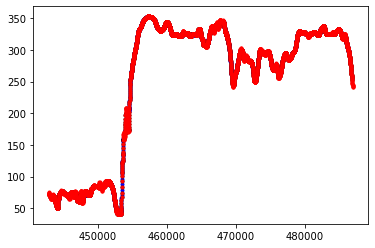

(3978, 9)


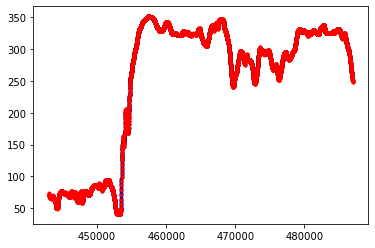

(3980, 9)


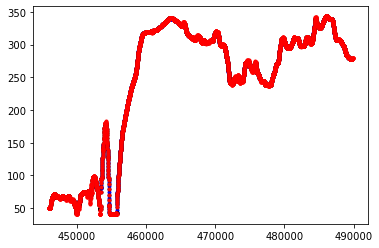

(3900, 9)


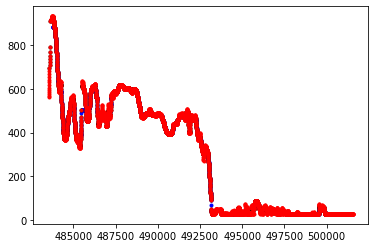

(3939, 9)


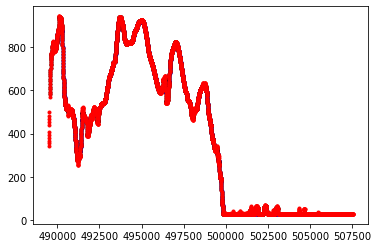

(3939, 9)


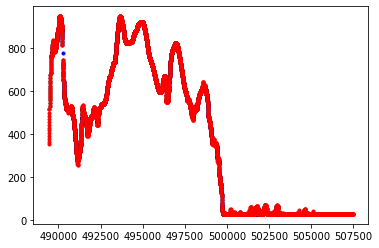

(3924, 9)


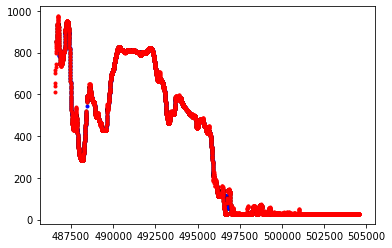

(3940, 9)


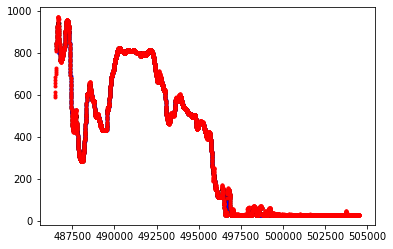

(3903, 9)


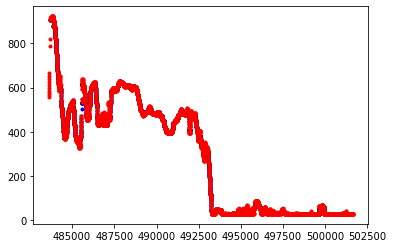

(3945, 9)


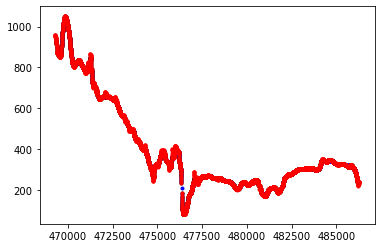

(3660, 9)


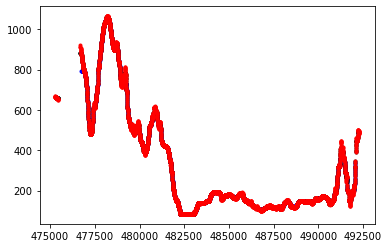

(3707, 9)


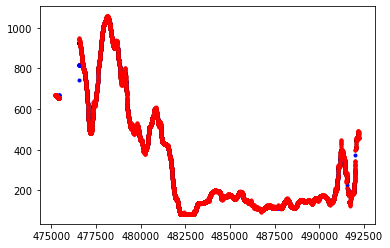

(3933, 9)


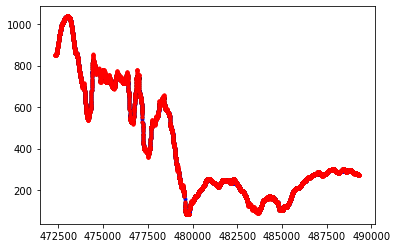

(3949, 9)


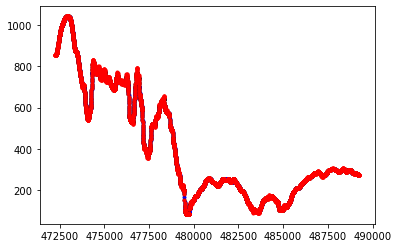

(3934, 9)


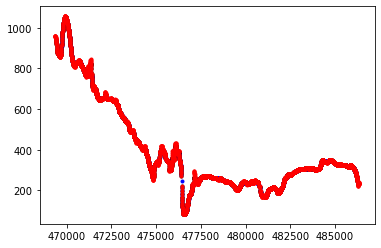

(137, 9)


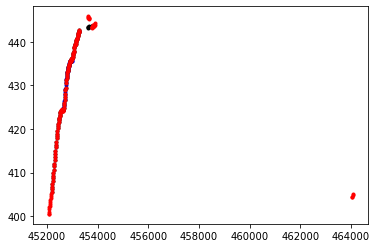

(6, 9)


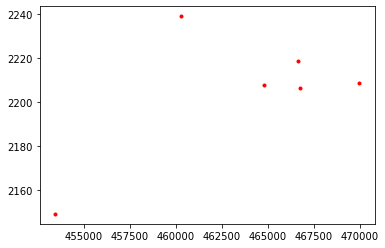

(0, 9)


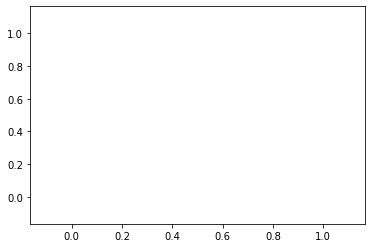

(13, 9)


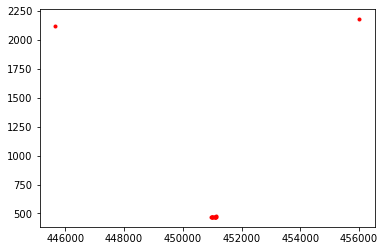

(94, 9)


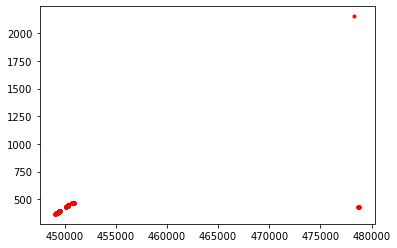

(63, 9)


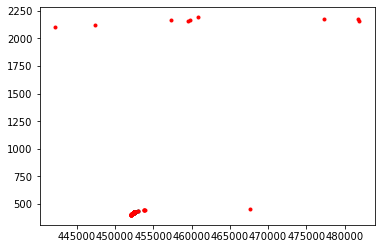

(3, 9)


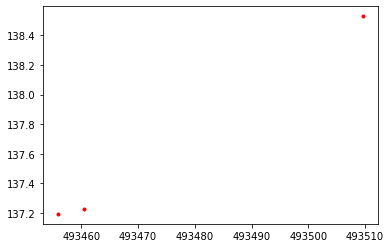

(66, 9)


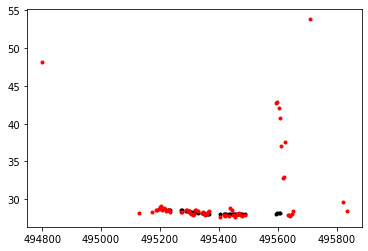

(248, 9)


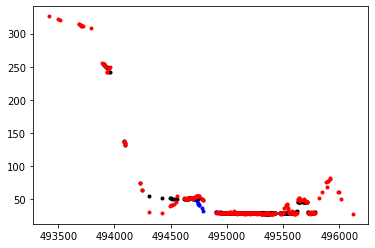

(2, 9)


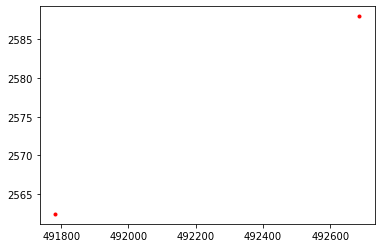

(205, 9)


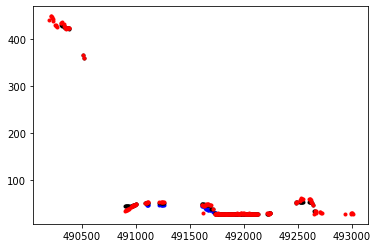

(0, 9)


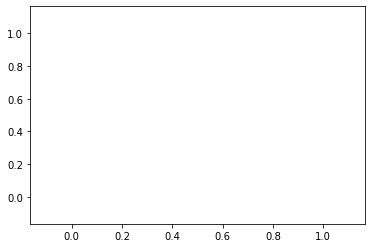

(3094, 9)


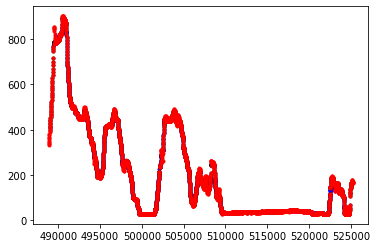

(3963, 9)


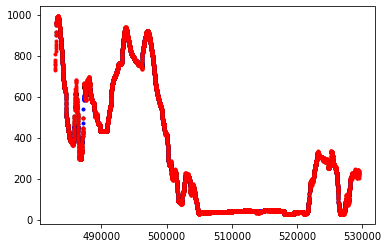

(3957, 9)


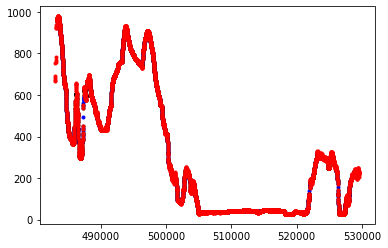

(3963, 9)


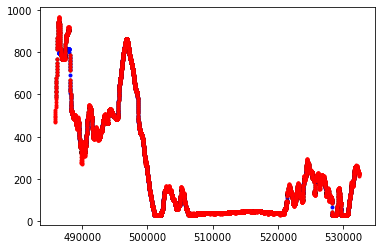

(3947, 9)


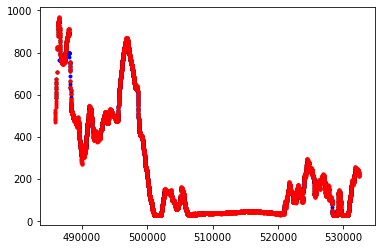

(3106, 9)


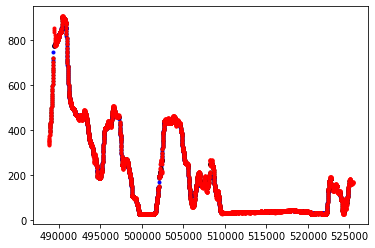

(2178, 9)


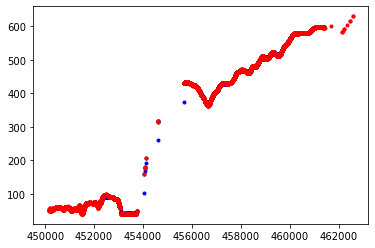

(860, 9)


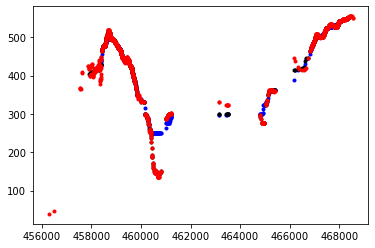

(2690, 9)


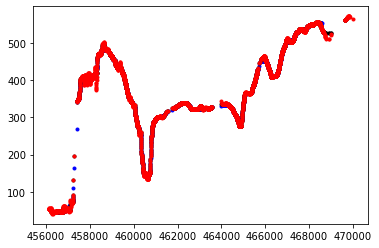

(695, 9)


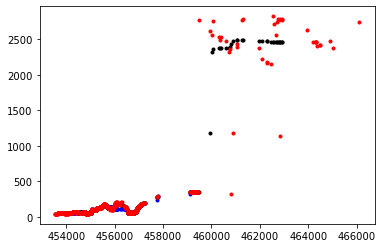

(2418, 9)


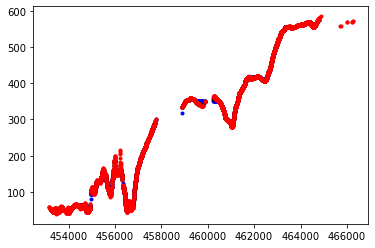

(834, 9)


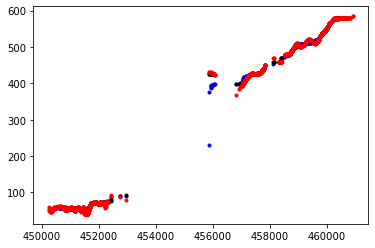

(0, 9)


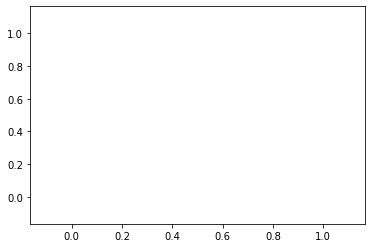

(0, 9)


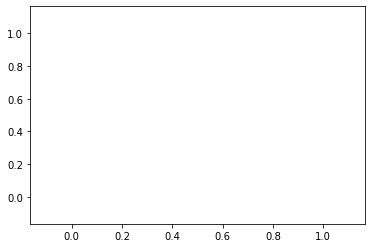

(1, 9)


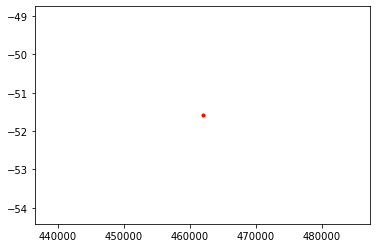

(0, 9)


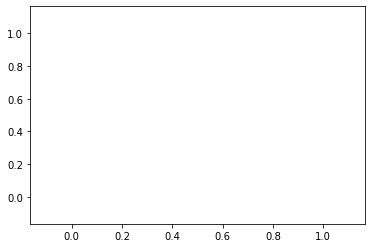

(3, 9)


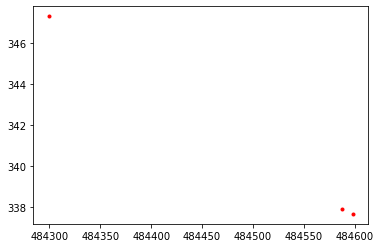

(0, 9)


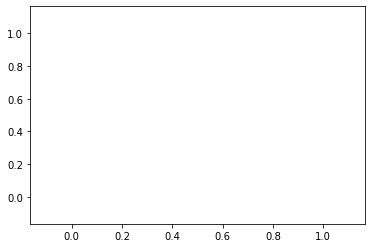

(0, 9)


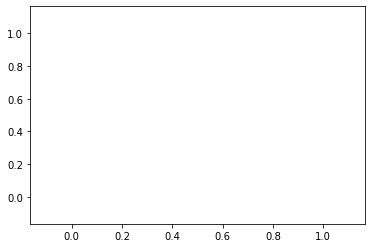

(107, 9)


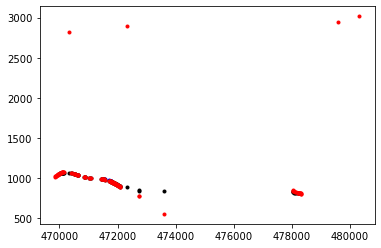

(3, 9)


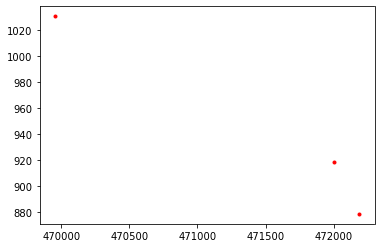

(8, 9)


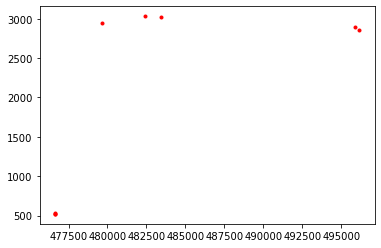

(0, 9)


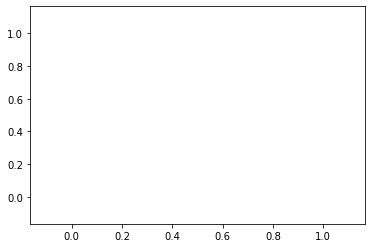

(5, 9)


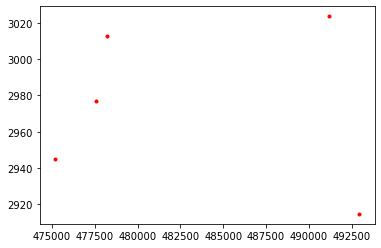

(3789, 9)


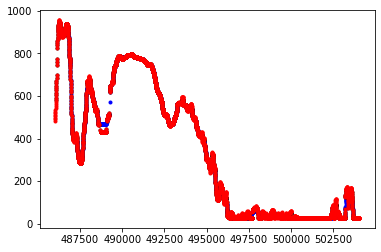

(3665, 9)


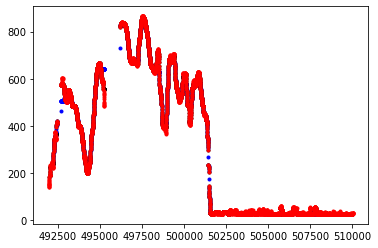

(3575, 9)


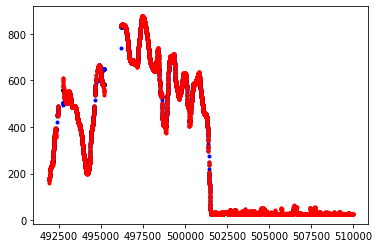

(3750, 9)


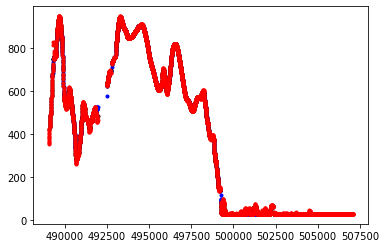

(3727, 9)


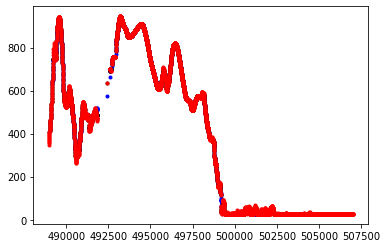

(3856, 9)


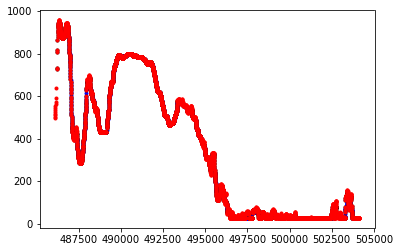

(3902, 9)


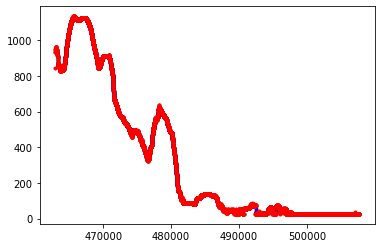

(3848, 9)


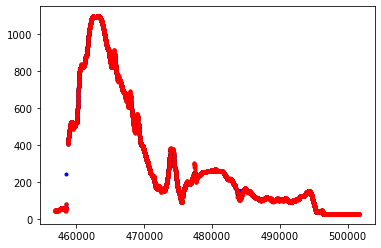

(3887, 9)


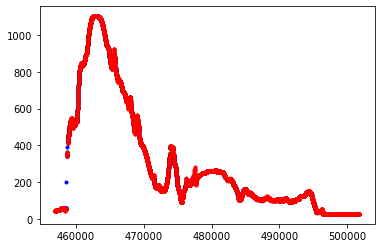

(3868, 9)


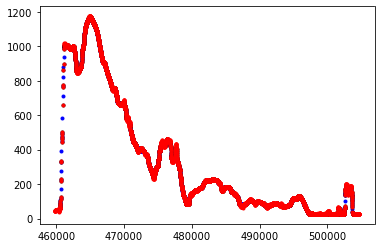

(3871, 9)


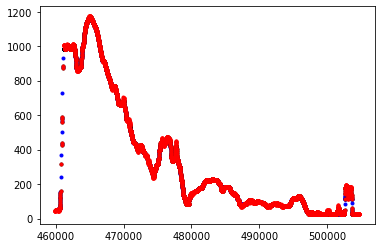

(3899, 9)


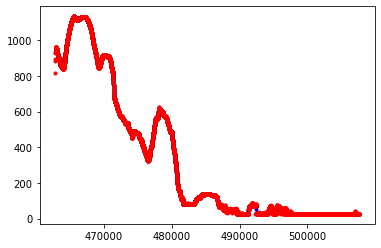

(0, 9)


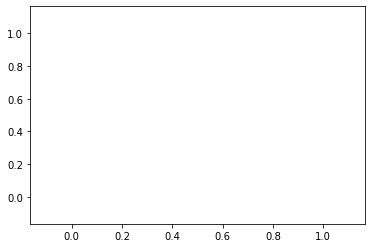

(1524, 9)


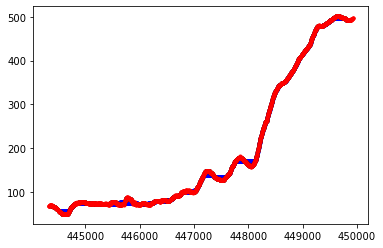

(1505, 9)


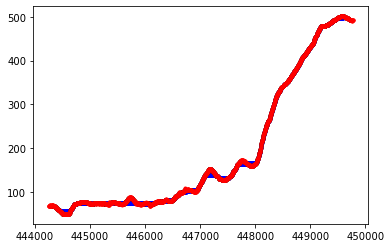

(678, 9)


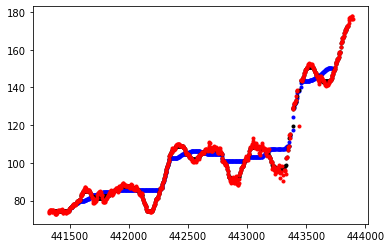

(651, 9)


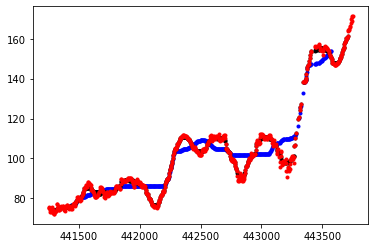

(0, 9)


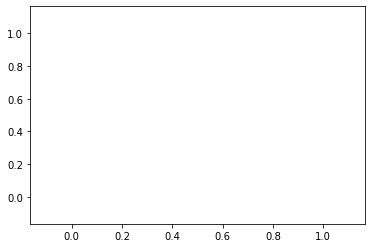

(2993, 9)


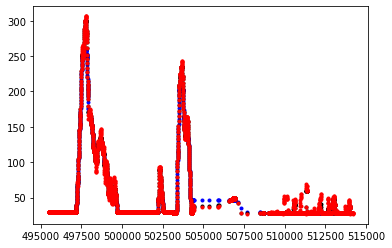

(3271, 9)


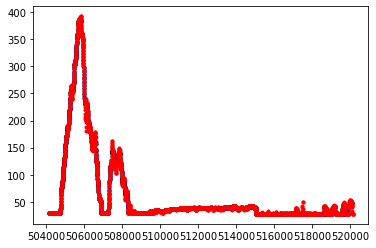

(2631, 9)


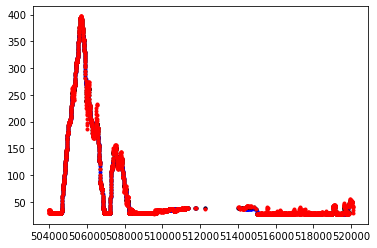

(3656, 9)


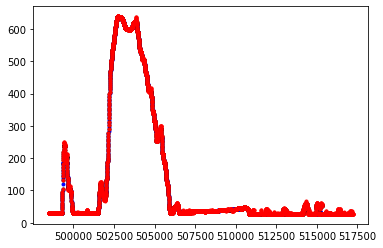

(3003, 9)


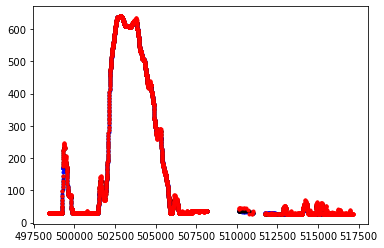

(3876, 9)


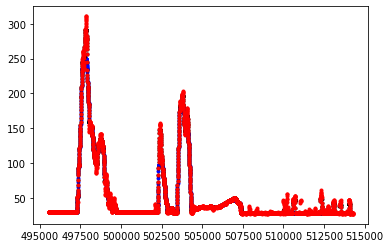

(0, 9)


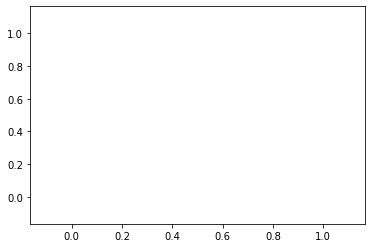

(200, 9)


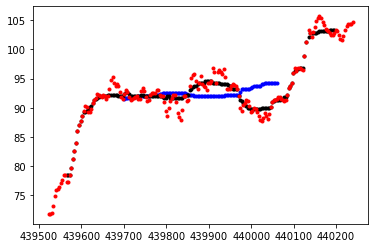

(177, 9)


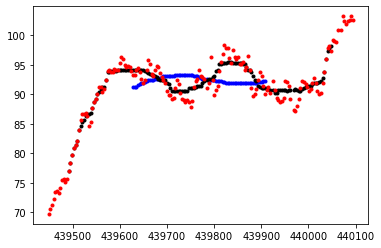

(0, 9)


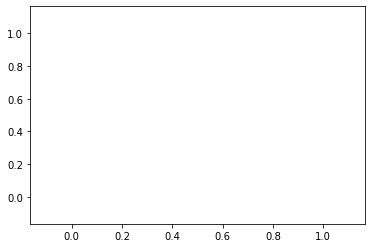

(0, 9)


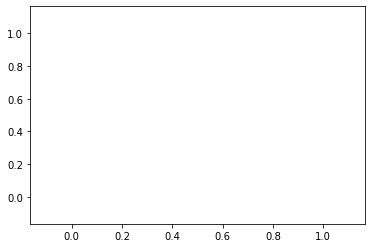

(0, 9)


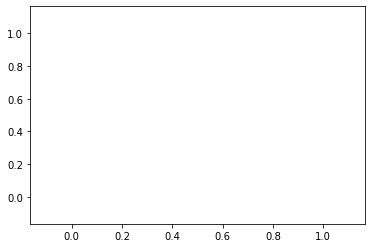

(3874, 9)


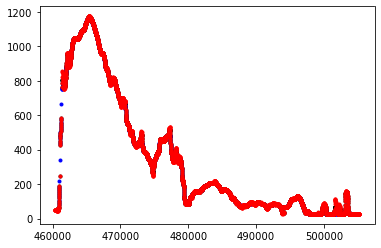

(3942, 9)


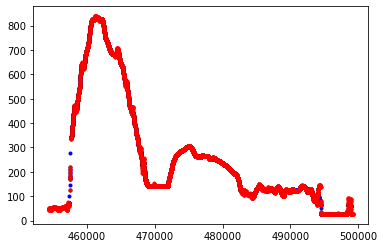

(3941, 9)


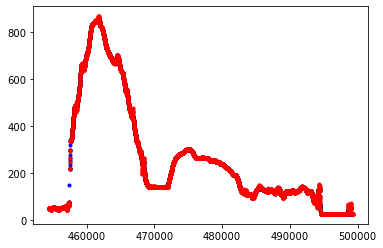

(3928, 9)


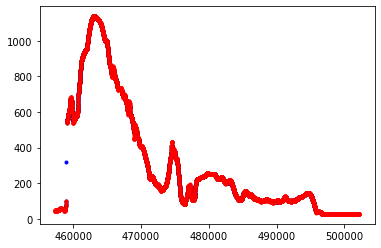

(3908, 9)


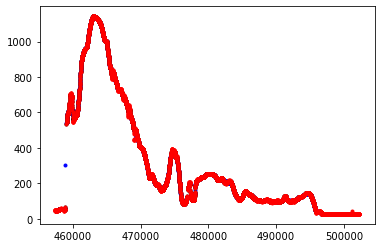

(3877, 9)


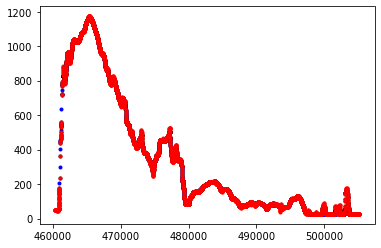

(3976, 9)


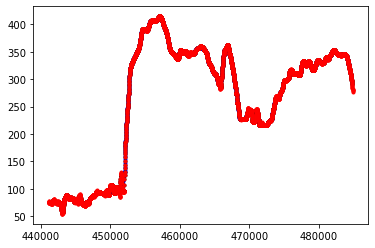

(2962, 9)


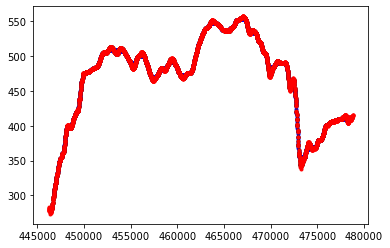

(2981, 9)


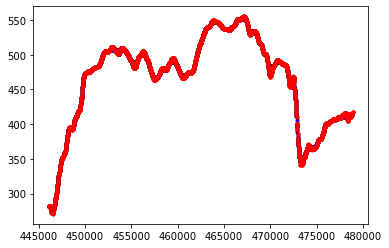

(3777, 9)


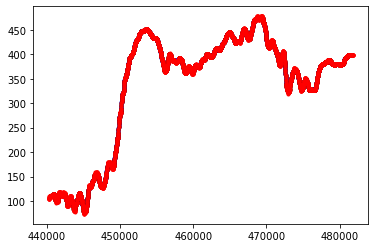

(3766, 9)


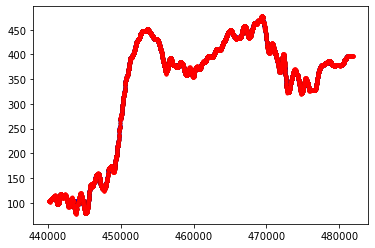

(3982, 9)


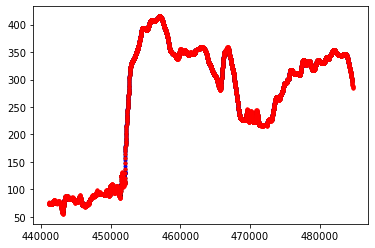

(3940, 9)


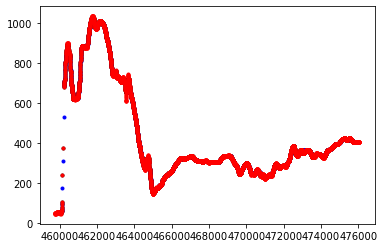

(3957, 9)


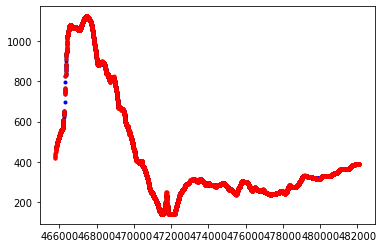

(3963, 9)


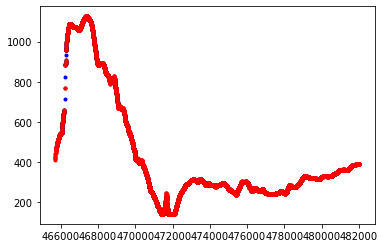

(3971, 9)


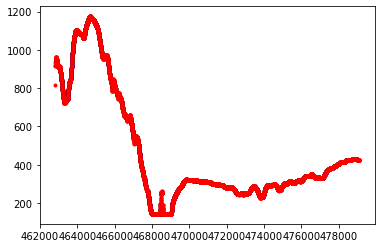

(3970, 9)


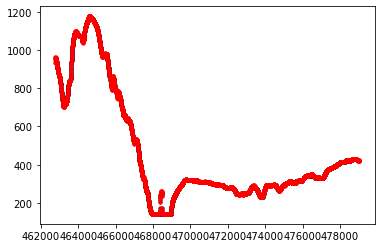

(3950, 9)


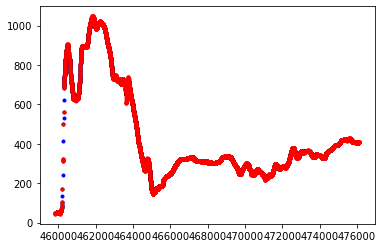

(3907, 9)


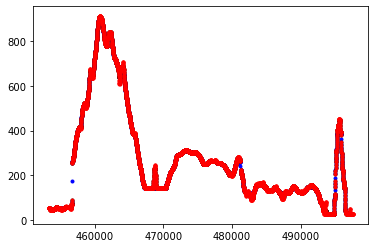

(3984, 9)


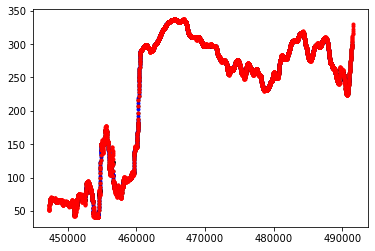

(3982, 9)


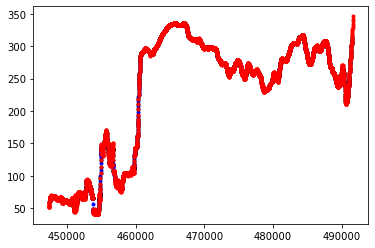

(3955, 9)


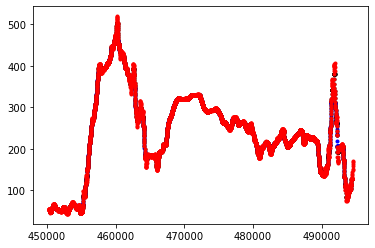

(3952, 9)


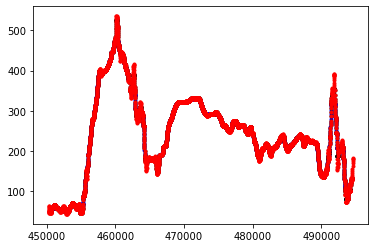

(3899, 9)


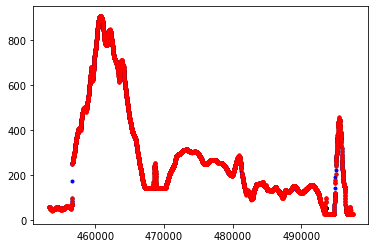

(0, 9)


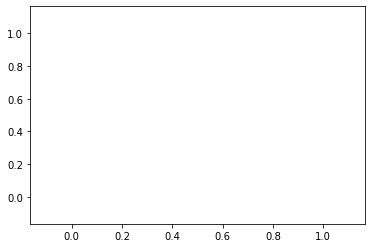

(0, 9)


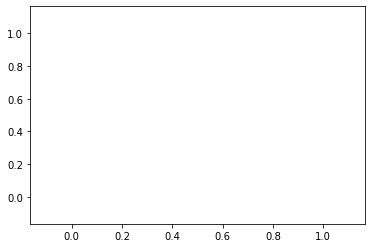

(0, 9)


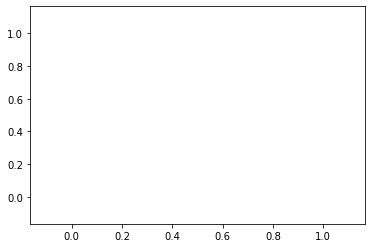

(2, 9)


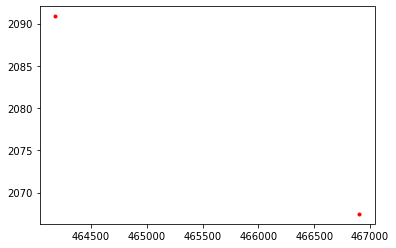

(5, 9)


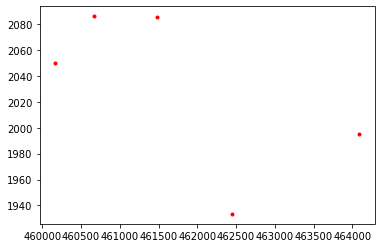

(1, 9)


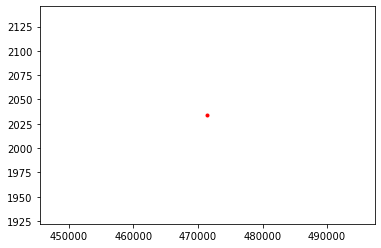

(3922, 9)


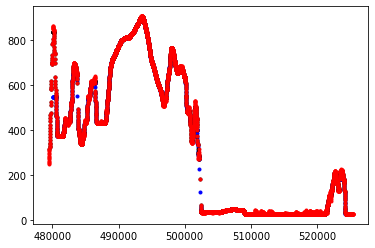

(3906, 9)


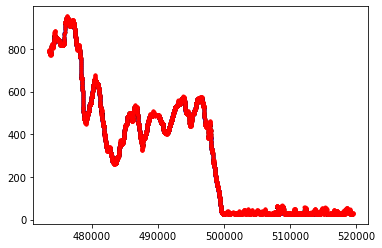

(3911, 9)


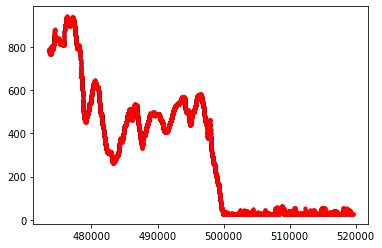

(3965, 9)


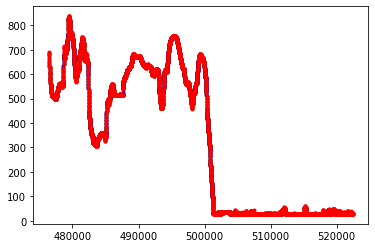

(3958, 9)


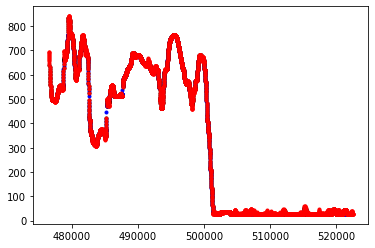

(3918, 9)


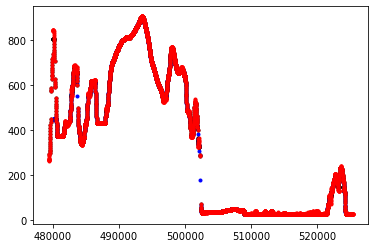

(3908, 9)


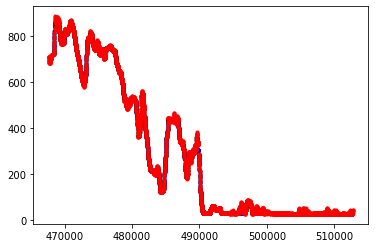

(3884, 9)


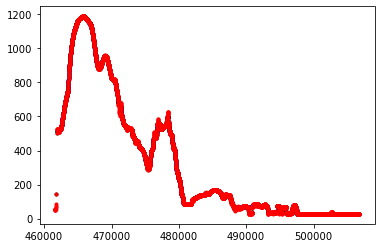

(3890, 9)


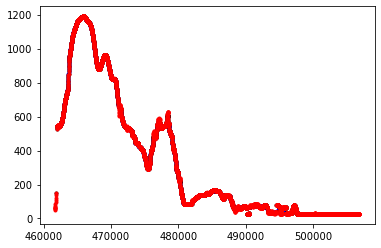

(3900, 9)


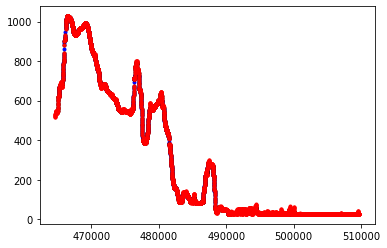

(3942, 9)


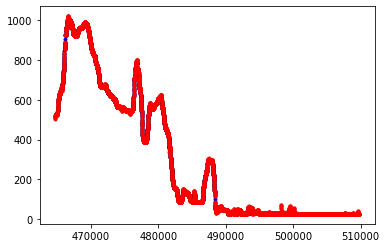

(3901, 9)


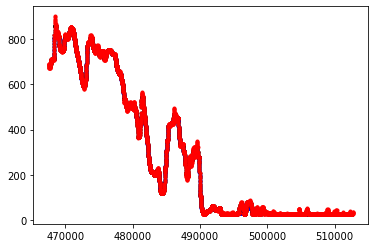

(1972, 9)


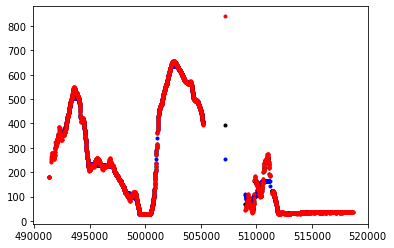

(3230, 9)


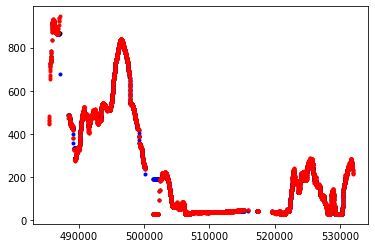

(3553, 9)


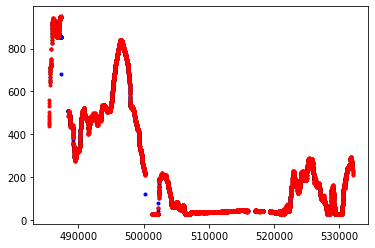

(2694, 9)


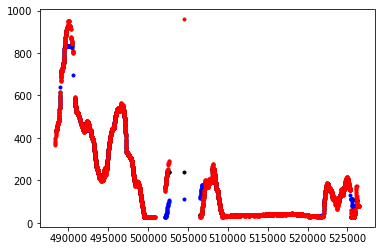

(2783, 9)


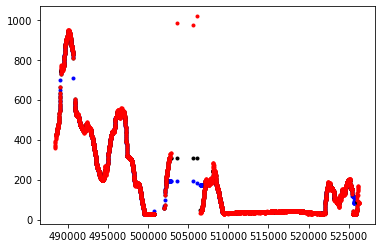

(1723, 9)


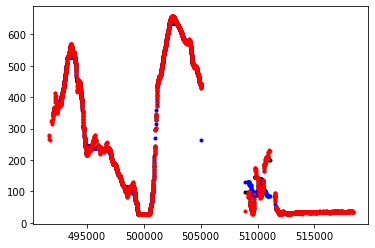

(3733, 9)


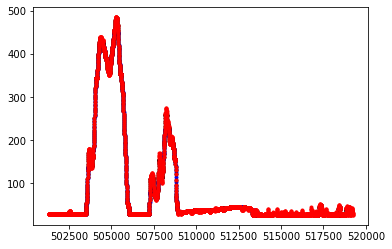

(2061, 9)


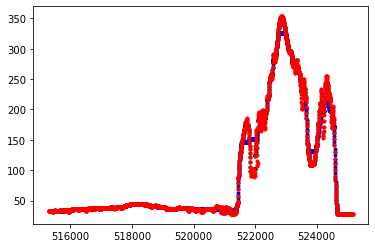

(2082, 9)


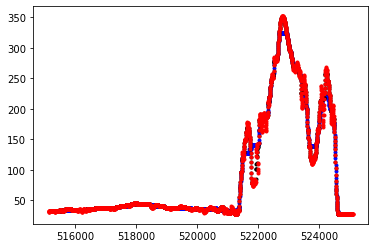

(2892, 9)


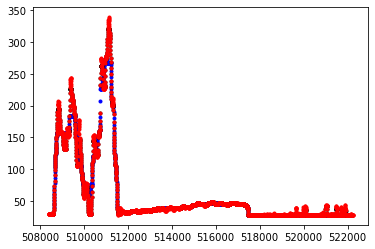

(2902, 9)


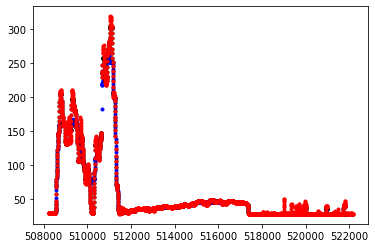

(3717, 9)


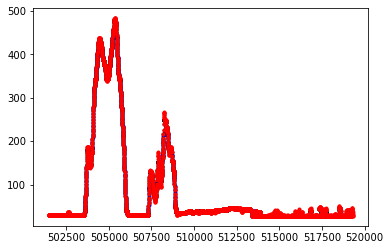

(3960, 9)


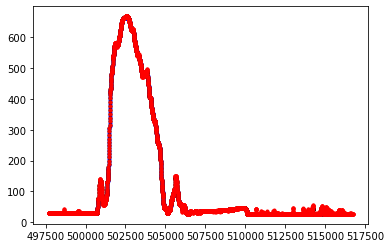

(2767, 9)


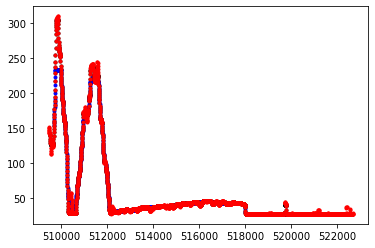

(2781, 9)


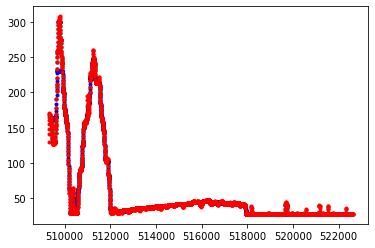

(3591, 9)


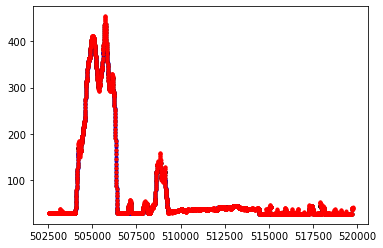

(3602, 9)


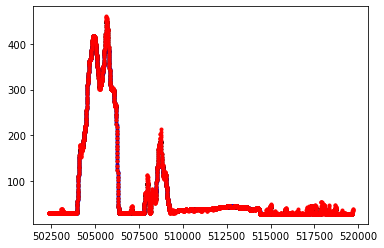

(3963, 9)


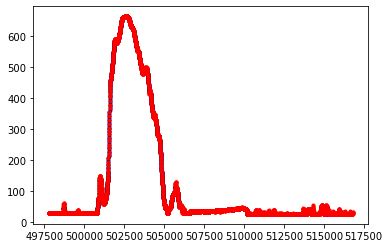

(3927, 9)


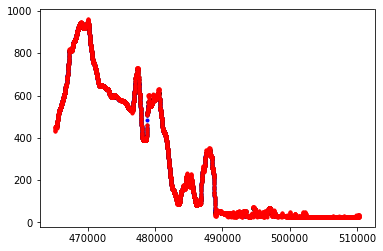

(3887, 9)


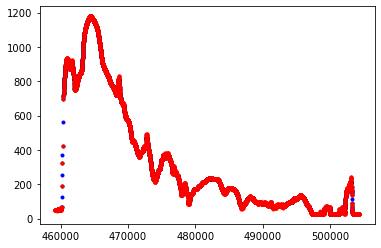

(3896, 9)


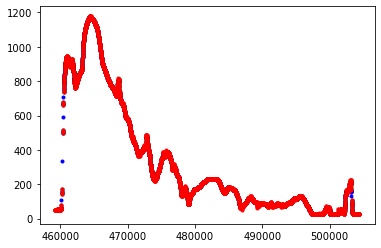

(3854, 9)


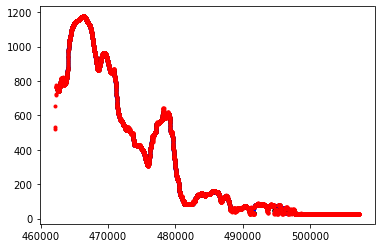

(3872, 9)


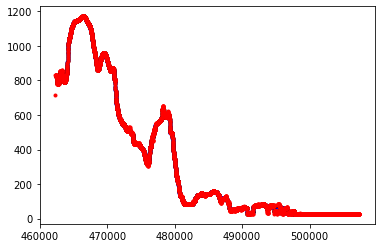

(3921, 9)


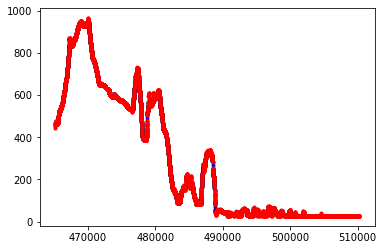

(3983, 9)


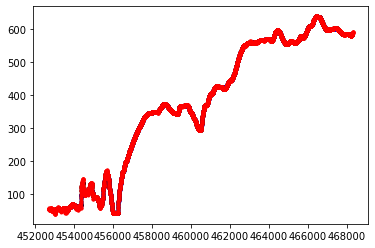

(3924, 9)


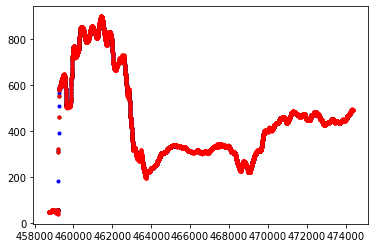

(3905, 9)


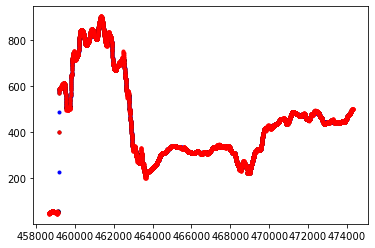

(3964, 9)


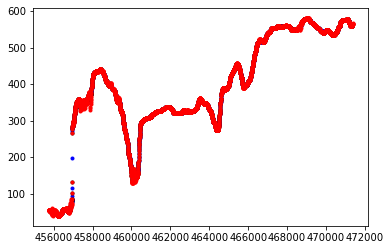

(3970, 9)


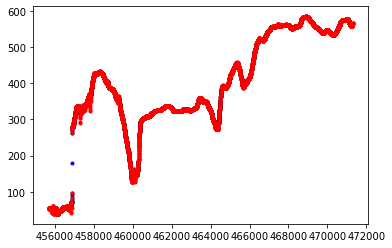

(3981, 9)


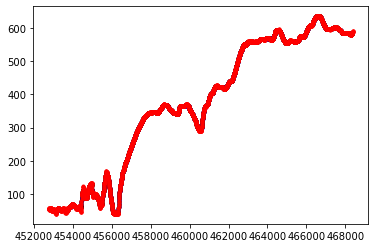

In [32]:
%matplotlib inline
for day in dfSat.date.unique():
    for tr in dfSat.track.unique():
        log = (dfSat['date'] == day) & (dfSat['track'] == tr)
        #tran = dfSat.query('date == @day & track == @tr')['h']
        #dfTran.sort_values(by='x',inplace=True)
        tran2 = dfSat[log]
        if tran.shape[0] == 0:
            continue
        print(tran2.shape)
        fig, ax = plt.subplots()
        #ax.plot(tran2['x'],tran2['hGaussian'],'.r')
        ax.plot(tran2['x'],tran2['hSupSm'],'.b')
        ax.plot(tran2['x'],tran2['hSm'],'.k')
        ax.plot(tran2['x'],tran2['h'],'.r')
        plt.show()
        #dfTran.plot(x='x',y='hGaussian',title = str(day)+str(tr),kind='scatter')
        #dfTran.plot(x='x',y='hMedian',title = str(day)+str(tr),kind='scatter')
        

In [33]:
dfSat.to_csv('ZachISatData_wSmoooth.csv',index=False)